In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import joblib

In [2]:
# Load dataset
df = pd.read_csv('/Users/ratan/Documents/creditcard.csv')

In [3]:
# Display first few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Display dataset shape
df.shape

(284807, 31)

In [5]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 31
Number of rows: 284807


In [6]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
# Data preprocessing 
df.isnull().sum().sum()   # Check for missing values

0

In [10]:
# Check for duplicate rows
df.duplicated().sum()

1081

In [11]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(283726, 31)

In [13]:
# Standardize 'Amount' and 'Time'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [14]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [15]:
# Calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


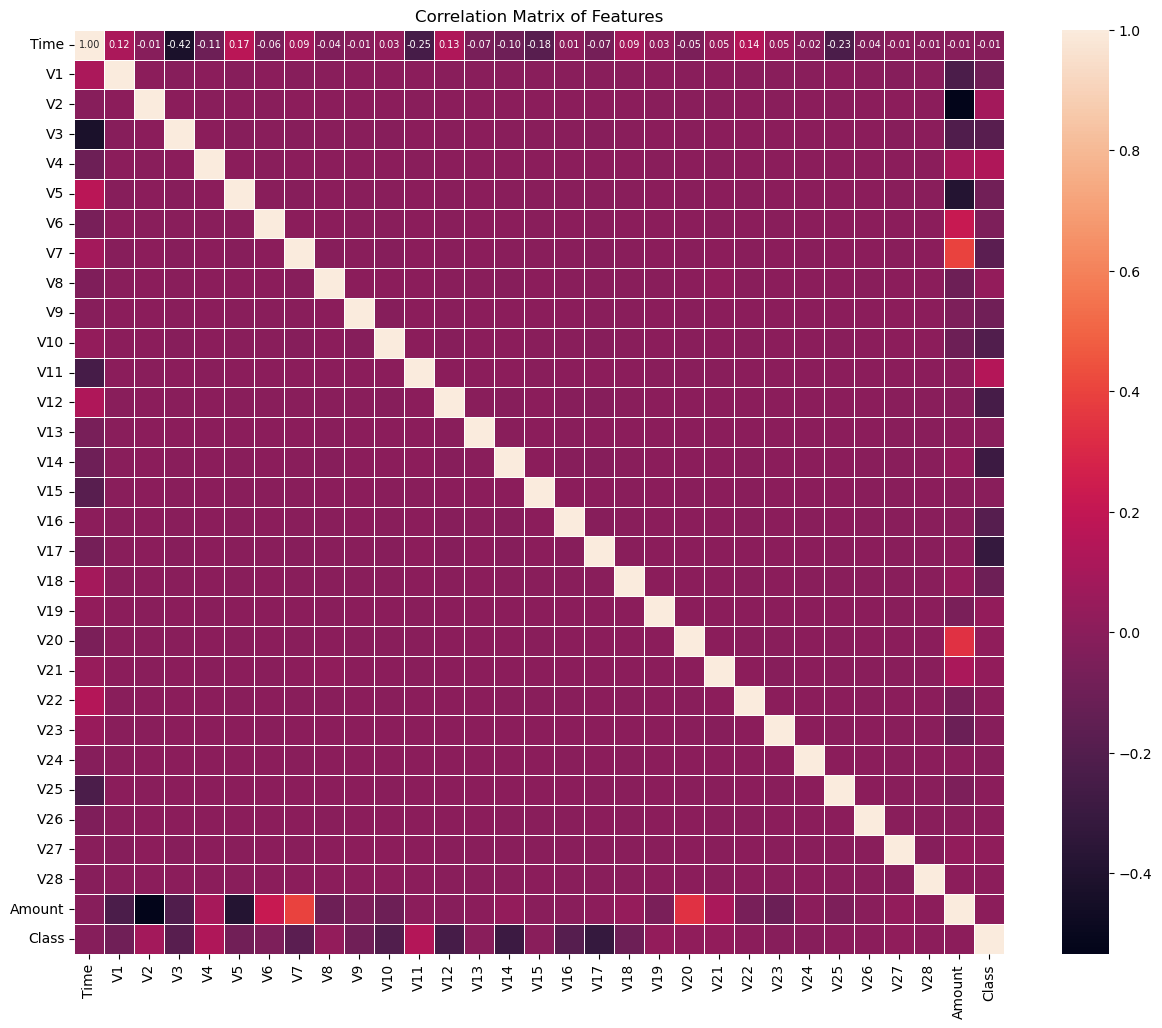

In [16]:
# Plot the Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, annot_kws={"size":7})
plt.title('Correlation Matrix of Features')
plt.show()

In [17]:
# Train-test split with imbalanced data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Check the shape
X_train.shape

(226980, 30)

In [19]:
X_test.shape

(56746, 30)

In [20]:
def train_model(X_train, X_test, y_train, y_test):

    classifier = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(random_state=42)
    }

    for name, model in classifier.items():
        print(f"\n================ {name} ================\n")
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix:\n{conf_matrix}\n")

        # Accuracy
        print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}\n")
        
        # Classification report
        clf_report = classification_report(y_test, y_pred)
        print(f"\nClassification Report:\n{clf_report}\n")
    
        # ROC-AUC Score
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC-AUC Score (Imbalanced Data): {roc_auc}\n")
    
        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve (Imbalanced Data)\nusing {name}', fontsize=10)
        plt.legend(loc='best')
        plt.show()
        print("\n")


================ Logistic Regression ================

Confusion Matrix:
[[56650     6]
 [   42    48]]


Accuracy: 0.9991541254009093


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.83     56746
weighted avg       1.00      1.00      1.00     56746


ROC-AUC Score (Imbalanced Data): 0.7666137155229219



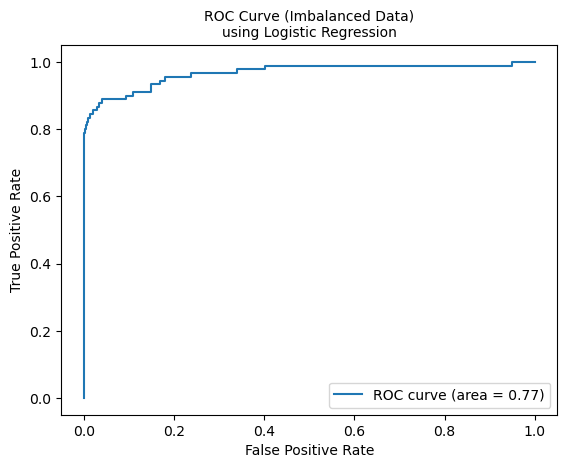




================ Decision Tree Classifier ================

Confusion Matrix:
[[56625    31]
 [   24    66]]


Accuracy: 0.9990307686885419


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.68      0.73      0.71        90

    accuracy                           1.00     56746
   macro avg       0.84      0.87      0.85     56746
weighted avg       1.00      1.00      1.00     56746


ROC-AUC Score (Imbalanced Data): 0.866393085757319



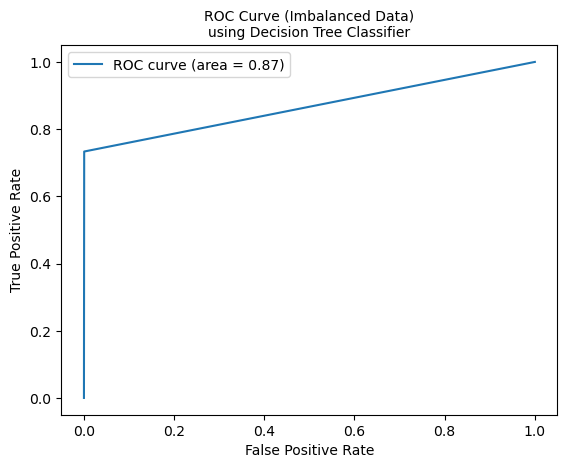




================ RandomForestClassifier ================

Confusion Matrix:
[[56654     2]
 [   24    66]]


Accuracy: 0.9995418179254926


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746


ROC-AUC Score (Imbalanced Data): 0.8666490162854185



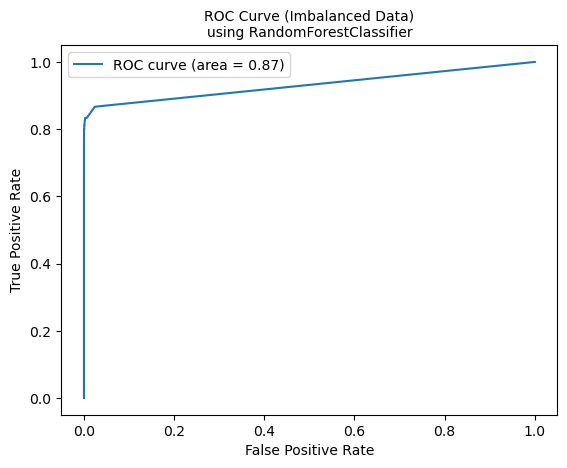

In [21]:
# Call the train_model function
train_model(X_train, X_test, y_train, y_test)

In [22]:
# Separate normal and fraud transactions
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

# Print shape for reference
print(f"Normal transactions shape: {normal.shape}")
print(f"Fraud transactions shape: {fraud.shape}")

Normal transactions shape: (283253, 31)
Fraud transactions shape: (473, 31)


In [23]:
# Undersample normal transactions
normal_sample = normal.sample(n=fraud.shape[0])

print(f"New normal transactions shape: {normal_sample.shape}")

New normal transactions shape: (473, 31)


In [24]:
# Concate updated normal transcations with old fraud transaction and make a new df
new_df = pd.concat([normal_sample, fraud], ignore_index=True)

In [25]:
# Print few rows of new df
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.109078,0.080581,0.501804,1.040330,-0.633567,0.492161,-0.280344,0.705681,-0.257862,-0.142031,...,-0.004967,0.224291,-0.009292,-0.353028,-0.781679,0.828904,-0.119563,-0.146560,-0.313391,0
1,-1.263055,1.141003,0.228983,0.409242,1.394868,-0.083849,-0.155353,0.142430,-0.066556,0.161034,...,-0.084417,0.006373,-0.083260,0.118725,0.687270,-0.316997,0.043034,0.020060,-0.269381,0
2,-1.290414,-1.654747,1.305353,0.899998,-0.718453,-0.848293,0.746340,-0.868406,-0.363469,-1.491247,...,1.040662,0.228624,0.165605,-0.296920,-0.648958,-0.307439,-1.326779,-0.455423,-0.313590,0
3,0.602345,1.975661,0.252027,-1.691307,1.361740,0.338954,-1.627673,0.830024,-0.517714,-0.110495,...,0.164529,0.503443,0.016320,0.339441,0.382661,-0.505537,-0.037323,-0.055826,-0.210675,0
4,1.233272,2.321533,-1.429094,-1.207602,-1.621910,-1.088651,-0.537756,-1.126809,-0.125676,-1.027292,...,-0.207001,-0.177919,0.238912,0.419341,-0.154656,-0.174052,-0.006024,-0.049360,-0.273454,0


In [26]:
# Check new class distribution
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [27]:
# Split new df into X and y
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [28]:
# Train test split on Undersampled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


================ Logistic Regression ================

Confusion Matrix:
[[83  5]
 [10 92]]


Accuracy: 0.9210526315789473


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        88
           1       0.95      0.90      0.92       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190


ROC-AUC Score (Imbalanced Data): 0.9225713012477719



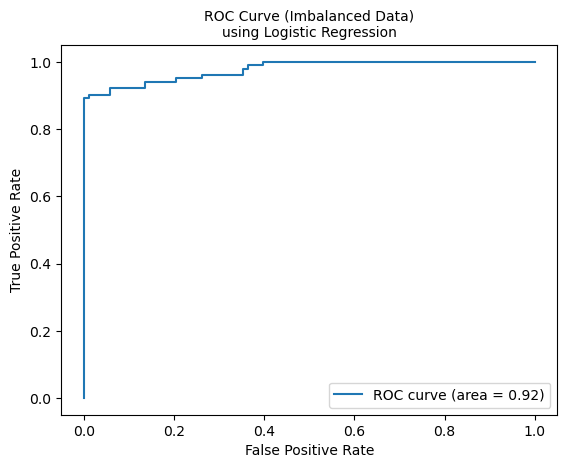




================ Decision Tree Classifier ================

Confusion Matrix:
[[77 11]
 [10 92]]


Accuracy: 0.8894736842105263


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        88
           1       0.89      0.90      0.90       102

    accuracy                           0.89       190
   macro avg       0.89      0.89      0.89       190
weighted avg       0.89      0.89      0.89       190


ROC-AUC Score (Imbalanced Data): 0.8884803921568627



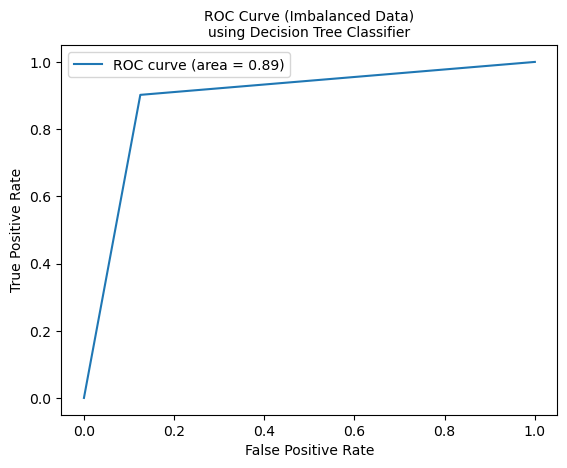




================ RandomForestClassifier ================

Confusion Matrix:
[[87  1]
 [10 92]]


Accuracy: 0.9421052631578948


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        88
           1       0.99      0.90      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.95      0.94       190
weighted avg       0.95      0.94      0.94       190


ROC-AUC Score (Imbalanced Data): 0.9452985739750446



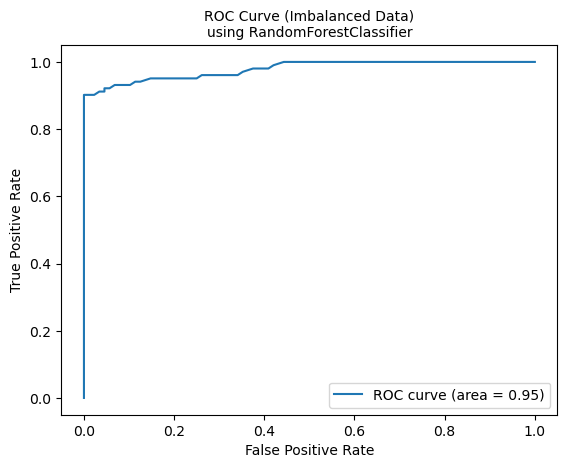

In [29]:
# Train models with undersampled data
# Call the train_model function
train_model(X_train, X_test, y_train, y_test)

In [30]:
#Oversampling
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [31]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [32]:
# Check new class distribution
y_resampled.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


================ Logistic Regression ================

Confusion Matrix:
[[55000  1463]
 [ 4737 52102]]


Accuracy: 0.9452789888969303


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56463
           1       0.97      0.92      0.94     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302


ROC-AUC Score (Imbalanced Data): 0.9453742812962184



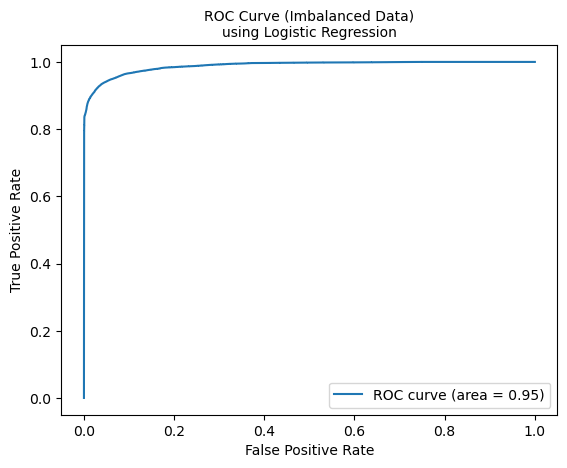




================ Decision Tree Classifier ================

Confusion Matrix:
[[56307   156]
 [   50 56789]]


Accuracy: 0.9981818502762528


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302


ROC-AUC Score (Imbalanced Data): 0.9981787255265392



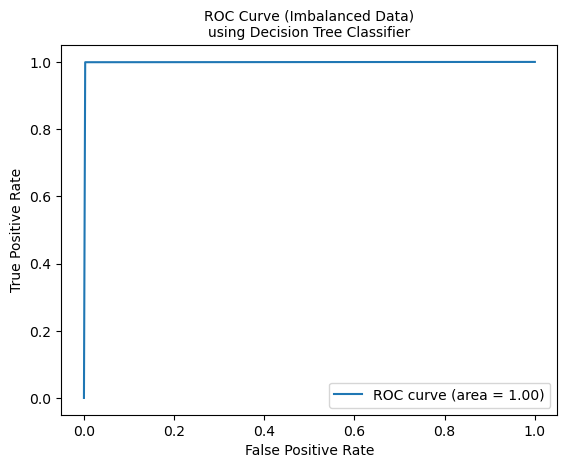




================ RandomForestClassifier ================

Confusion Matrix:
[[56452    11]
 [    0 56839]]


Accuracy: 0.9999029143351397


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302


ROC-AUC Score (Imbalanced Data): 0.9999025910773427



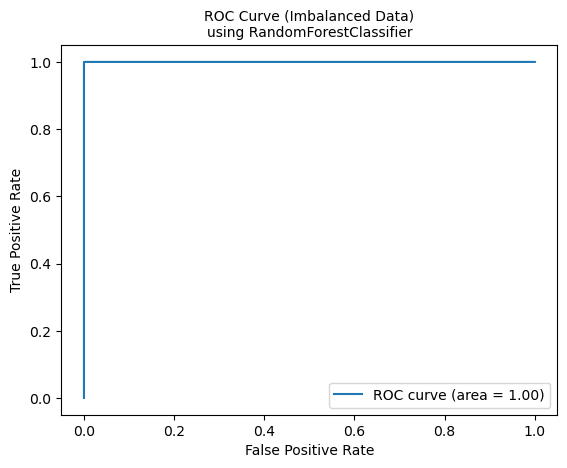

In [34]:
train_model(X_train, X_test, y_train, y_test)

In [35]:
# Pick a model, Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Predict with a sample data
pred = model.predict([[-1.2063166480452974,-0.653464067093327,1.15579454161356,1.4398458100309,-0.0483979577939286,-0.257954764175468,-0.763320426103366,0.339229688923037,-0.768705965846787,-0.115541693321453,-0.20021646873148,-0.650926246487322,-0.735778340137806,-1.3940656101548,0.447721760826057,0.98477163074674,0.271223077633162,-0.251055900420813,-0.165413052650476,0.0091942158033362,-0.160498072645411,0.518041029678345,-0.970619090556498,0.104889604203672,0.307935462300307,-0.222502578722938,0.0825004649897294,0.291624326333603,0.125488524044667,-0.3442213776454372]])

# Print the prediction
if pred == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")

Normal Transaction


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [37]:
# Pick a model, 
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
# Predict with a sample data
pred = model2.predict([[-1.2063166480452974,-0.653464067093327,1.15579454161356,1.4398458100309,-0.0483979577939286,-0.257954764175468,-0.763320426103366,0.339229688923037,-0.768705965846787,-0.115541693321453,-0.20021646873148,-0.650926246487322,-0.735778340137806,-1.3940656101548,0.447721760826057,0.98477163074674,0.271223077633162,-0.251055900420813,-0.165413052650476,0.0091942158033362,-0.160498072645411,0.518041029678345,-0.970619090556498,0.104889604203672,0.307935462300307,-0.222502578722938,0.0825004649897294,0.291624326333603,0.125488524044667,-0.3442213776454372]])

# Print the prediction
if pred == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")

Normal Transaction


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [39]:
# Pick a model, 
model3 = LogisticRegression(random_state=42)
model3.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [40]:
# Predict with a sample data
pred = model3.predict([[-1.2063166480452974,-0.653464067093327,1.15579454161356,1.4398458100309,-0.0483979577939286,-0.257954764175468,-0.763320426103366,0.339229688923037,-0.768705965846787,-0.115541693321453,-0.20021646873148,-0.650926246487322,-0.735778340137806,-1.3940656101548,0.447721760826057,0.98477163074674,0.271223077633162,-0.251055900420813,-0.165413052650476,0.0091942158033362,-0.160498072645411,0.518041029678345,-0.970619090556498,0.104889604203672,0.307935462300307,-0.222502578722938,0.0825004649897294,0.291624326333603,0.125488524044667,-0.3442213776454372]])

# Print the prediction
if pred == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")

Normal Transaction


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Project Summary:

Data Exploration: Explored the dataset, visualized class imbalance, and performed preprocessing.
Feature Correlations: Analyzed feature relationships to guide selection and reduce redundancies.
Imbalance Handling: Applied undersampling/oversampling techniques to address class imbalance.
Model Training: Tested classifiers (Logistic Regression, Decision Tree, RandomForest), with RandomForest achieving the best accuracy for fraud detection.

Key Findings:
    Correlation analysis improved feature selection.
    RandomForest is highly effective at detecting fraud.
    Addressing imbalance was crucial for model performance.